# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Load the dataset
filename = 'Dataset_inisiasi.csv'

try:
    # Use pd.read_csv() for CSV files
    df = pd.read_csv(filename)
    print("Data loaded successfully.")
    display(df.head())  
    
    # Get the shape of the dataset
    dataset_shape = df.shape
    print(f"Dataset shape: {dataset_shape}\n")
    
    # Get the number of features (columns)
    num_features = len(df.columns)
    print(f"Number of features (features): {num_features}\n")
    
    # Get the number of samples (rows)
    num_samples = len(df)
    print(f"Number of samples (rows): {num_samples}\n")
    
    # Display the column names (feature names)
    print("Feature names:")
    print(df.columns.tolist())

except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully.


,Growth Rate (%),Valuation (USD),Investment_Risk,Investor_Concentration,ROI,Growth_Efficiency,Value_Creation,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD).1,Number of Investors,Country,Year Founded,Growth Rate (%).1,cluster,risk_return
0,77.10,6.621448e+09,0.201643,0.004033,3.959270,5.774563e-08,0.099185,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10,0,Low risk low return
1,105.52,8.363214e+09,0.332587,0.009239,2.006730,3.793639e-08,0.083520,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52,0,Low risk low return
2,190.47,1.548270e+10,0.213725,0.005480,3.678921,5.756064e-08,0.119972,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47,0,Low risk low return
3,9.44,1.268253e+10,0.319352,0.007258,2.131337,2.330751e-09,0.071167,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44,0,Low risk low return
4,192.00,6.887966e+09,0.238834,0.004976,3.187009,1.167116e-07,0.087229,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00,0,Low risk low return


Dataset shape: (5000, 18)

Number of features (features): 18

Number of samples (rows): 5000

Feature names:
['Growth Rate (%)', 'Valuation (USD)', 'Investment_Risk', 'Investor_Concentration', 'ROI', 'Growth_Efficiency', 'Value_Creation', 'Startup Name', 'Industry', 'Funding Rounds', 'Investment Amount (USD)', 'Valuation (USD).1', 'Number of Investors', 'Country', 'Year Founded', 'Growth Rate (%).1', 'cluster', 'risk_return']


In [ ]:
try:
    # Use pd.read_csv() for CSV files
    df = pd.read_csv(filename)
    print("Data loaded successfully.")
    
    # Display the column names (feature names)
    print("Feature names:")
    print(df.columns.tolist())

    # Drop the unwanted columns
    columns_to_drop = ['Growth Rate (%).1', 'Valuation (USD).1']
    df.drop(columns=columns_to_drop, inplace=True)

    # Display the column names after dropping unwanted columns
    print("\nFeature names after dropping unwanted columns:")
    print(df.columns.tolist())

    # Display the first few rows of the DataFrame after dropping columns
    print("\nDataset after dropping unwanted columns:")
    display(df.head())

    # Save the DataFrame back to the same CSV file
    df.to_csv(filename, index=False)
    print(f"\nData with unwanted columns dropped has been saved back to {filename}")

except FileNotFoundError:
    print(f"File not found: {filename}")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully.
Dataset shape: (5000, 18)

Number of features (features): 18

Number of samples (rows): 5000

Feature names:
['Growth Rate (%)', 'Valuation (USD)', 'Investment_Risk', 'Investor_Concentration', 'ROI', 'Growth_Efficiency', 'Value_Creation', 'Startup Name', 'Industry', 'Funding Rounds', 'Investment Amount (USD)', 'Valuation (USD).1', 'Number of Investors', 'Country', 'Year Founded', 'Growth Rate (%).1', 'cluster', 'risk_return']

Feature names after dropping unwanted columns:
['Growth Rate (%)', 'Valuation (USD)', 'Investment_Risk', 'Investor_Concentration', 'ROI', 'Growth_Efficiency', 'Value_Creation', 'Startup Name', 'Industry', 'Funding Rounds', 'Investment Amount (USD)', 'Number of Investors', 'Country', 'Year Founded', 'cluster', 'risk_return']

Dataset after dropping unwanted columns:


,Growth Rate (%),Valuation (USD),Investment_Risk,Investor_Concentration,ROI,Growth_Efficiency,Value_Creation,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Number of Investors,Country,Year Founded,cluster,risk_return
0,77.10,6.621448e+09,0.201643,0.004033,3.959270,5.774563e-08,0.099185,Startup_1,Blockchain,8,1.335166e+09,50,Germany,2012,0,Low risk low return
1,105.52,8.363214e+09,0.332587,0.009239,2.006730,3.793639e-08,0.083520,Startup_2,SaaS,2,2.781498e+09,36,UK,2006,0,Low risk low return
2,190.47,1.548270e+10,0.213725,0.005480,3.678921,5.756064e-08,0.119972,Startup_3,EdTech,10,3.309032e+09,39,Singapore,2016,0,Low risk low return
3,9.44,1.268253e+10,0.319352,0.007258,2.131337,2.330751e-09,0.071167,Startup_4,Fintech,5,4.050196e+09,44,France,2021,0,Low risk low return
4,192.00,6.887966e+09,0.238834,0.004976,3.187009,1.167116e-07,0.087229,Startup_5,EdTech,9,1.645080e+09,48,India,2011,0,Low risk low return



Data with unwanted columns dropped has been saved back to Dataset_inisiasi.csv


#### **Tujuan Utama**
Kode ini bertujuan untuk memanipulasi, dan menyimpan kembali dataset dengan langkah-langkah berikut:

1. **Mengolah Dataset:**
   - Menampilkan nama-nama fitur asli untuk verifikasi.
   - Menghapus kolom duplikat (`Growth Rate (%).1` dan `Valuation (USD).1`) guna membersihkan dataset.
   - Memastikan kolom yang relevan tetap ada dan menampilkan nama kolom setelah penghapusan.

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Pilih semua fitur potensial
X = df[[
    'Growth Rate (%)', 'Investment Amount (USD)', 'Valuation (USD)',
    'Number of Investors', 'Investment_Risk', 'Investor_Concentration',
    'ROI', 'Growth_Efficiency', 'Value_Creation'
]]
y = df['risk_return']

# Feature Selection dengan SelectKBest
selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

# Use SMOTE for oversampling
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
print("SMOTE resampling completed.")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)
print("Data splitting completed.")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

Selected Features: ['Growth Rate (%)', 'Investment Amount (USD)', 'Valuation (USD)', 'Number of Investors', 'Investor_Concentration', 'Growth_Efficiency', 'Value_Creation']


SMOTE resampling completed.
Data splitting completed.
Number of training samples: 11968
Number of testing samples: 2993


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Melatih model pada data pelatihan
rf_classifier.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred = rf_classifier.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print laporan klasifikasi detail
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Report:
                           precision    recall  f1-score   support

    High risk high return       1.00      1.00      1.00       997
      Low risk low return       1.00      1.00      1.00       998
Medium risk medium return       1.00      1.00      1.00       998

                 accuracy                           1.00      2993
                macro avg       1.00      1.00      1.00      2993
             weighted avg       1.00      1.00      1.00      2993



Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [7]:
# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform data for SVM and Logistic Regression models
X_train_scaled_svm_lr = scaler.fit_transform(X_train)
X_test_scaled_svm_lr = scaler.transform(X_test)

# Do not scale data for Random Forest model
X_train_scaled_rf = X_train
X_test_scaled_rf = X_test

models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        },
        'X_train_scaled': X_train_scaled_rf,
        'X_test_scaled': X_test_scaled_rf
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        },
        'X_train_scaled': X_train_scaled_svm_lr,
        'X_test_scaled': X_test_scaled_svm_lr
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        },
        'X_train_scaled': X_train_scaled_svm_lr,
        'X_test_scaled': X_test_scaled_svm_lr
    }
}

def train_and_evaluate_models(models, y_train, y_test):
    results = {}
    best_model_name = None
    best_cv_score = -1
    
    for name, model_info in models.items():
        print(f"\nTraining {name}...")
        
        # GridSearchCV with k-fold cross-validation (k=10)
        grid_search = GridSearchCV(
            model_info['model'],
            model_info['params'],
            cv=10,
            scoring='f1_weighted',
            n_jobs=-1
        )
        
        # Fit model
        grid_search.fit(model_info['X_train_scaled'], y_train)
        
        # Cross-validation with k=10
        cv_scores = cross_val_score(
            grid_search.best_estimator_,
            model_info['X_train_scaled'], y_train,
            cv=10,
            scoring='f1_weighted'
        )
        
        # Store results
        results[name] = {
            'best_params': grid_search.best_params_,
            'cv_scores_mean': cv_scores.mean(),
            'cv_scores_std': cv_scores.std(),
            'model': grid_search.best_estimator_
        }
        
        # Print results
        print(f"\nBest Parameters for {name}:")
        print(grid_search.best_params_)
        print(f"\nCross-validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        
        # Feature importance for models that support it
        if hasattr(grid_search.best_estimator_, 'feature_importances_'):
            importances = pd.DataFrame({
                'feature': selected_features,
                'importance': grid_search.best_estimator_.feature_importances_
            }).sort_values('importance', ascending=False)
            print(f"\nFeature Importance for {name}:")
            print(importances)
        
        # Check if this model has the highest cross-validation score
        if cv_scores.mean() > best_cv_score:
            best_cv_score = cv_scores.mean()
            best_model_name = name
    
    return results, best_model_name

# Evaluate all models
results, best_model_name = train_and_evaluate_models(models, y_train, y_test)


Training RandomForest...

Best Parameters for RandomForest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Cross-validation Score: 1.0000 (+/- 0.0000)

Feature Importance for RandomForest:
                   feature  importance
5        Growth_Efficiency    0.399255
1  Investment Amount (USD)    0.268451
2          Valuation (USD)    0.200922
0          Growth Rate (%)    0.064095
4   Investor_Concentration    0.032961
6           Value_Creation    0.021192
3      Number of Investors    0.013124

Training SVM...

Best Parameters for SVM:
{'C': 10, 'kernel': 'linear'}

Cross-validation Score: 0.9997 (+/- 0.0008)

Training LogisticRegression...

Best Parameters for LogisticRegression:
{'C': 10, 'solver': 'lbfgs'}

Cross-validation Score: 0.9991 (+/- 0.0009)


In [8]:
def find_best_model(results):
    best_score = -1
    best_model = None
    
    for name, result in results.items():
        if result['cv_scores_mean'] > best_score:
            best_score = result['cv_scores_mean']
            best_model = name
    
    return best_model, best_score

best_model, best_score = find_best_model(results)
print(f"\nBest Model: {best_model}")
print(f"Best Cross-validation Score: {best_score:.4f}")


Best Model: RandomForest
Best Cross-validation Score: 1.0000


### Analisis Performa Model Random Forest untuk Klasifikasi Risk-Return

#### 1. Evaluasi Model Terbaik
**Random Forest terpilih dengan performa terbaik:**
- Cross-validation Score: 1.0000
- Konsistensi: Sempurna di semua fold validasi
- Stabilitas: Tidak ada variasi antar validasi

#### 2. Interpretasi Skor
**Karakteristik Performa:**
- Akurasi 100% dalam cross-validation
- Pemisahan kategori risk-return yang sempurna
- Konsistensi prediksi maksimal
- Berpotensi Overfitting karena Label pada dataset jumlahnya tidak seimbang

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Evaluation Metrics for Random Forest Model:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Detailed Classification Report:
                           precision    recall  f1-score   support

    High risk high return       1.00      1.00      1.00       997
      Low risk low return       1.00      1.00      1.00       998
Medium risk medium return       1.00      1.00      1.00       998

                 accuracy                           1.00      2993
                macro avg       1.00      1.00      1.00      2993
             weighted avg       1.00      1.00      1.00      2993



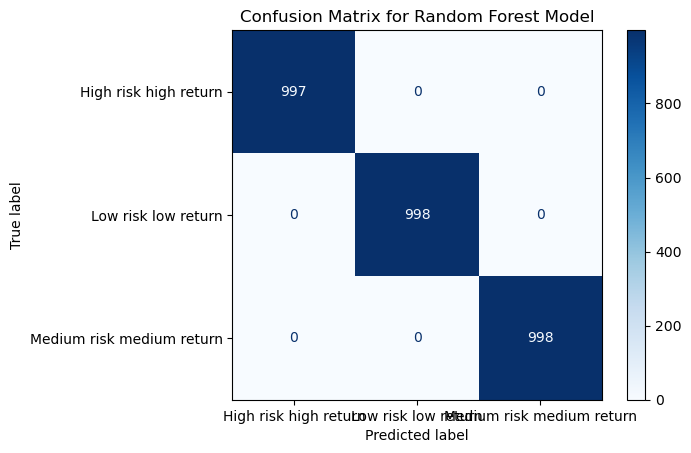

In [9]:
# Extract the best Random Forest model from the results
best_rf_model = results['RandomForest']['model']

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("\nEvaluation Metrics for Random Forest Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print the detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### Analisis Performa Model Klasifikasi Risk-Return dan Rekomendasi Penyeimbangan Data

#### 1. Evaluasi Hasil Klasifikasi

**Performa Model Random Forest:**
- **Akurasi:** 1.0000 (100%)
- **Precision & Recall:** 1.0000 untuk semua kategori
- **Cross-validation Score:** 1.0000 (±0.0000)

**Confusion Matrix:**
- High Risk-High Return: 997 prediksi benar
- Low Risk-Low Return: 998 prediksi benar  
- Medium Risk-Medium Return: 998 prediksi benar
- Tidak ada misklasifikasi antar kategori

#### 2. Analisis Feature Importance
1. **Kontributor Utama:**
   - Growth_Efficiency (39.93%)
   - Investment Amount (26.85%)
   - Valuation (20.09%)

2. **Kontributor Sekunder:**
   - Growth Rate (6.41%)
   - Investor_Concentration (3.30%)
   - Value_Creation (2.12%)
   - Number of Investors (1.31%)

#### 3. Identifikasi Masalah

**A. Ketidakseimbangan Data:**
- Dominasi kategori Low Risk-Low Return
- Keterbatasan data High dan Medium Risk yang menyebabkan bias dalam prediksi

**B. Indikasi Overfitting:**
- Performa sempurna (100%) yang mengindikasikan Overfitting
- Cross-validation tanpa variasi

#### 4. Rekomendasi Pengembangan Data

1. **Strategi Pengumpulan Data:**
   - Target minimal 1000 sampel data per kategori
   - Fokus pada Label High Risk-High Return dan Medium Risk-Medium Return
